<a href="https://colab.research.google.com/github/prysykes/adversarial_attacks/blob/main/CW_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist

In [2]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)
  os.rmdir('/content/MNISTClassifier')

In [3]:
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape(60000, 28, 28).astype("float32")/255
images = np.expand_dims(images, axis=3)
test_images = test_images.reshape(10000, 28, 28).astype("float32")/255
test_images = np.expand_dims(test_images, axis=3)
x_train, x_test = images[10000:], images[:10000]
y_train, y_test = labels[10000:], labels[:10000]


11490434/11490434 [==============================] - 2s 0us/step


In [4]:
print(y_train[0])

3


In [5]:
#create validation data from train dataset
print(len(x_train))
x_train, x_val = x_train[10000:], x_train[:10000]
y_train, y_val = y_train[10000:], y_train[:10000]
print(len(x_train))

50000
40000


2


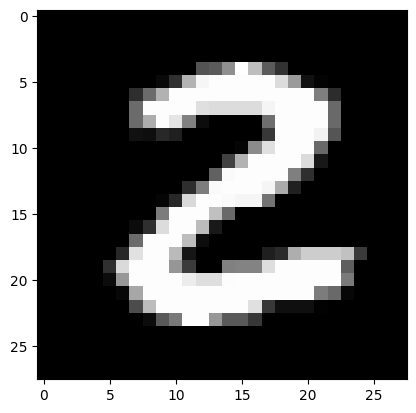

In [6]:
x_test[5].shape
digit = x_test[25]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[16])

In [9]:
few_fives = []
count = 0
for index, label in enumerate(y_test):
  if count > 4:
    break
  if label == 5:
    few_fives.append((index, label))
    count +=1
print(few_fives)

[(0, 5), (11, 5), (35, 5), (47, 5), (65, 5)]


In [10]:
class MNISTClassifier(tf.keras.Model):
  def __init__(self):
    super(MNISTClassifier, self).__init__()

    #define the layers for feature extraction
    self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
    self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
    self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
    self.flatten = tf.keras.layers.Flatten()
    self.dropout1 = tf.keras.layers.Dropout(0.25)
    self.dense1 = tf.keras.layers.Dense(128, activation='relu')
    self.dropout2 = tf.keras.layers.Dropout(0.5)
    self.dense2 = tf.keras.layers.Dense(10)
    self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                        self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]

  def call(self, *args, **kwargs):
    #define forward pass
    activation_list = []
    out = args[0]
    for layer in self.layers_list:
      out = layer(out)
      activation_list.append(out)

    return out

In [11]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
model.save('MNISTClassifier')
model.summary()

Epoch 1/10
1250/1250 [==============================] - 17s 5ms/step - loss: 0.2693 - accuracy: 0.9161 - val_loss: 0.0742 - val_accuracy: 0.9773
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1010 - accuracy: 0.9701 - val_loss: 0.0467 - val_accuracy: 0.9853
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0784 - accuracy: 0.9761 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0640 - accuracy: 0.9795 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0576 - accuracy: 0.9822 - val_loss: 0.0376 - val_accuracy: 0.9885
Epoch 6/10
1250/1250 [==============================] - 5s 4ms/step - loss: 0.0480 - accuracy: 0.9849 - val_loss: 0.0295 - val_accuracy: 0.9917
Epoch 7/10
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0253 - val_accuracy

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  320       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18496     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dropout (Dropout)           multiple             

In [15]:
model = tf.keras.models.load_model('MNISTClassifier')

In [16]:
fives_tupple = [(0, 5), (11, 5), (35, 5), (47, 5), (65, 5)]
reshaped_sample_fives = []

for tup in fives_tupple:
  a_five = x_test[tup[0]]
  a_five = np.reshape(a_five, (-1, 28, 28, 1))
  reshaped_sample_fives.append(a_five)

reshaped_sample_fives = np.array(reshaped_sample_fives)

In [27]:
# print((x_test[0][:10]))

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

<class 'numpy.ndarray'>


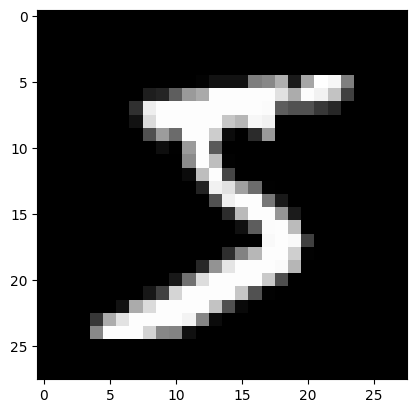

In [17]:
plt.imshow(np.squeeze(reshaped_sample_fives[0], axis=0), cmap='gray')
print(type(reshaped_sample_fives[0]))

In [18]:
predictions = []
for sample in reshaped_sample_fives:
  sample_prediction = model.predict(sample)
  predictions.append(sample_prediction)

print(np.argmax(predictions[0]))

1/1 [==============================] - 0s 21ms/step
5


In [19]:
print(model(reshaped_sample_fives[0])) #outputs the logits

tf.Tensor(
[[-18.448668   -11.256746   -18.311634    10.375411   -16.107586
   15.200964    -8.535495   -12.187293    -3.2306068   -0.40055728]], shape=(1, 10), dtype=float32)


In [64]:
def cw_attack(model, image, target_class, max_iterations=12, confidence=0.0, learning_rate=0.01):
  #cw_attack loss function
  def cw_loss(logits, target_class, confidence):
    target_one_hot = tf.one_hot(target_class, logits.shape[1])
    correct_logits = tf.reduce_sum(target_one_hot * logits, axis=1)
    other_logits = tf.reduce_max((1-target_one_hot) * logits - target_one_hot * 10000, axis=1)
    loss = tf.maximum(0.0, other_logits - correct_logits + confidence)
    return tf.reduce_mean(loss)

  image_shape = image.shape
  image = tf.convert_to_tensor(image)
  image = tf.expand_dims(image, axis=0)

  target_class = tf.convert_to_tensor(target_class)

  image_var = tf.Variable(image, dtype=tf.float32)

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  for iteration in range(max_iterations):
    with tf.GradientTape() as tape:
      logits = model(image_var)
      loss = cw_loss(logits, target_class, confidence)

    gradients = tape.gradient(loss, image_var)
    optimizer.apply_gradients([(gradients, image_var)])

    image_var.assign(tf.clip_by_value(image_var, 0.0, 0.1))

    if iteration % 100 == 0:
      print(f"iteration: {iteration} \t loss: {loss.numpy()}")

  adversarial_image = image_var.numpy().reshape(image_shape)

  return adversarial_image


In [46]:
x = reshaped_sample_fives[0]
print(x.shape)

(1, 28, 28, 1)


In [59]:
predict_x = model.predict(x)
print(predict_x)
print(np.argmax(predict_x))

1/1 [==============================] - 0s 18ms/step
[[-18.448668   -11.256746   -18.311634    10.375411   -16.107586
   15.200964    -8.535495   -12.187293    -3.2306068   -0.40055728]]
5


In [48]:
ori_image = tf.squeeze(x, axis=0)
print(ori_image.shape)

(28, 28, 1)


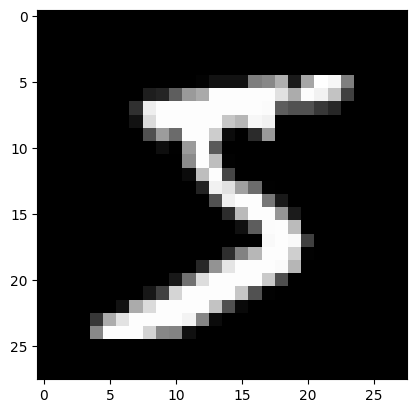

In [60]:
plt.imshow(ori_image, cmap='gray')

In [65]:
adv_image = cw_attack(model, ori_image, 2)

iteration: 0 	 loss: 33.512596130371094


In [51]:
print(adv_image.shape)

(28, 28, 1)


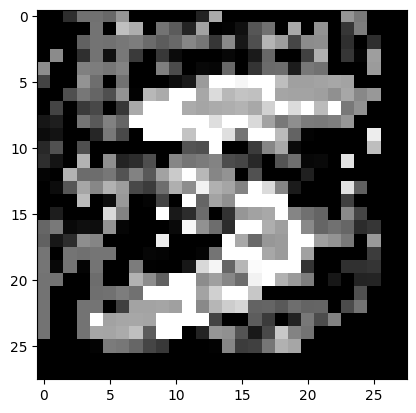

In [66]:
plt.imshow(adv_image, cmap='gray')

In [67]:
print(np.argmax(model.predict(np.expand_dims(adv_image, axis=0))))

1/1 [==============================] - 0s 20ms/step
1
